# Naive Bayes

**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Importing the Data and Analysis it**

In [2]:
data = pd.read_csv("airline_tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


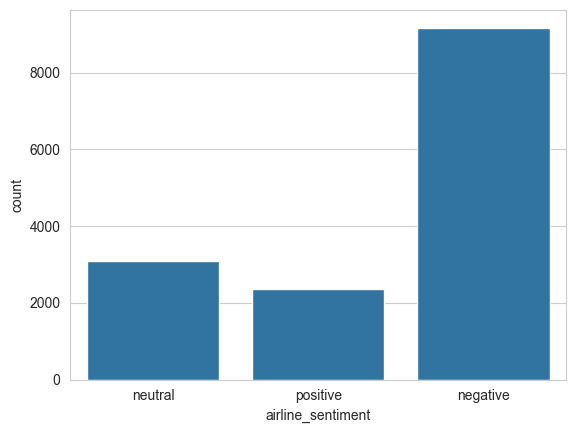

In [3]:
plt.figure(dpi=100)
sns.countplot(data, x="airline_sentiment");

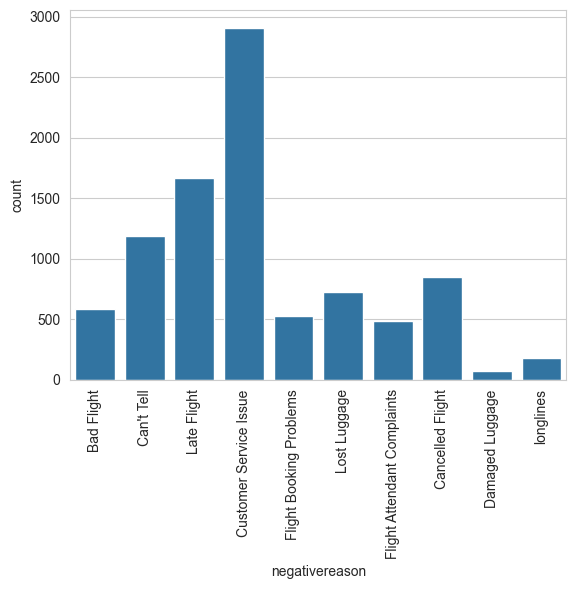

In [4]:
plt.figure(dpi=100)
sns.countplot(data, x="negativereason")
plt.xticks(rotation=90);

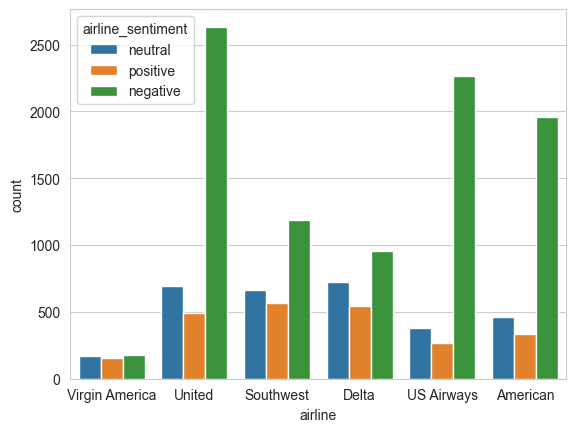

In [5]:
plt.figure(dpi=100)
sns.countplot(data, x="airline", hue="airline_sentiment");

**Taking the Raw Text as the Independent Features and Airline Sentiment as the Dependent Features**

In [6]:
x = data["text"]
y = data["airline_sentiment"]

**Splitting the data into the Training and Testing Data**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Converting the text to the TF-IDF Vectorizer**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit(x_train)
x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

**Implementing the Naive Bayes**

In [9]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_clasifier = MultinomialNB()
naive_bayes_clasifier.fit(x_train_tfidf, y_train)
naive_bayes_predict = naive_bayes_clasifier.predict(x_test_tfidf)

**Implementing the Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_tfidf, y_train)
log_reg_predict = log_reg.predict(x_test_tfidf)

**Implementing the Support Vector Classifier and Linear SVC** 

In [11]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(x_train_tfidf, y_train)
svc_predict = svc.predict(x_test_tfidf)

linear_svc = LinearSVC(dual="auto")
linear_svc.fit(x_train_tfidf, y_train)
linear_svc_predict = linear_svc.predict(x_test_tfidf)

**Take a report of all models**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

def report(prediction):
    print("Classification Report -\n", classification_report(y_test, prediction))
    print("Confusion Matrix -\n", confusion_matrix(y_test, prediction))
    
report(naive_bayes_predict)
report(log_reg_predict)
report(svc_predict)
report(linear_svc_predict)

Classification Report -
               precision    recall  f1-score   support

    negative       0.67      1.00      0.80      1841
     neutral       0.82      0.13      0.22       637
    positive       0.90      0.19      0.31       450

    accuracy                           0.68      2928
   macro avg       0.80      0.44      0.44      2928
weighted avg       0.74      0.68      0.60      2928

Confusion Matrix -
 [[1834    6    1]
 [ 549   80    8]
 [ 355   11   84]]
Classification Report -
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1841
     neutral       0.69      0.46      0.55       637
    positive       0.77      0.62      0.69       450

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Confusion Matrix -
 [[1730   79   32]
 [ 294  294   49]
 [ 117   55  278]]
Classification Report -
              

**Creating the Pipeline to the best fitted model like Linear SVC on the full data**

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC(dual="auto"))])

pipeline.fit(x, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC(dual='auto'))])

**Predicting the data**

In [14]:
pipeline.predict(["Amazing Flight"])

array(['positive'], dtype=object)